# Classification examples

In this notebook, we walk through the different usages of the ICARE package for classification tasks.

In [32]:
import pandas as pd
from sklearn import datasets
from icare.classification import IcareClassifier, BaggedIcareClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, ShuffleSplit
from icare.visualisation import plot_avg_sign

We use the iris dataset from scikit-learn.

In [50]:
dts = datasets.load_iris()
X, y = dts['data'], dts['target']
X = pd.DataFrame(data=X, columns=dts['feature_names'])
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Note that the target is multiclass. The ICARE model support both binary and multiclass classification.

In [53]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Both `IcareClassifier` and `BaggedIcareClassifier` can be used like any other scikit-learn estimator.

In [54]:
model = IcareClassifier()
model.fit(X, y)
pred = model.predict(X)
print(f1_score(y, pred, average='weighted'))

model = BaggedIcareClassifier()
model.fit(X, y)
pred = model.predict(X)
print(f1_score(y, pred, average='weighted'))

0.5430136018371312
0.84


They are compatible with any scikit-learn function.

In [55]:
print(cross_val_score(IcareClassifier(), X, y,
                      cv=ShuffleSplit(n_splits=10, test_size=.25, random_state=42),
                      n_jobs=-1,
                      scoring='accuracy').mean())

print(cross_val_score(BaggedIcareClassifier(n_estimators=100,                                                 n_jobs=1),
                      X, y,
                      cv=ShuffleSplit(n_splits=10, test_size=.25, random_state=42),
                      n_jobs=-1,
                      scoring='accuracy').mean())

0.6789473684210525
0.8078947368421053


For interpretation, you can use the `plot_avg_sign` function to plot the average signs of the features in the estimators of the `BaggedIcareClassifier` model (one estimator per class).

A positive sign means that the feature is concordant with the target value (e.g. increase the probability to belong to the associated class), and the other way around for a negative sign. A value close to zero mean that the feature sign was unstable. This can be due to a low predictive power.

Model of class 0 :


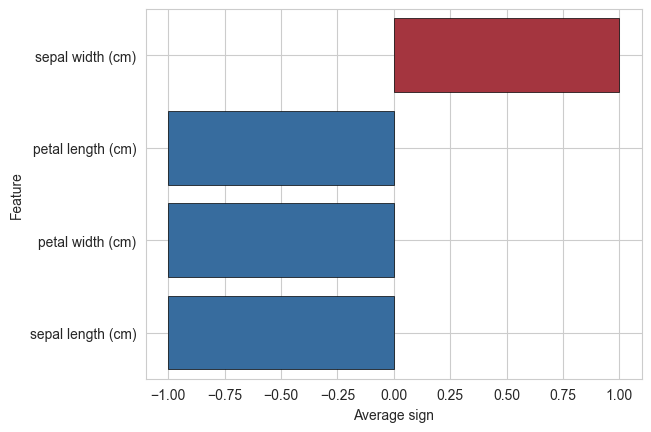

Model of class 1 :


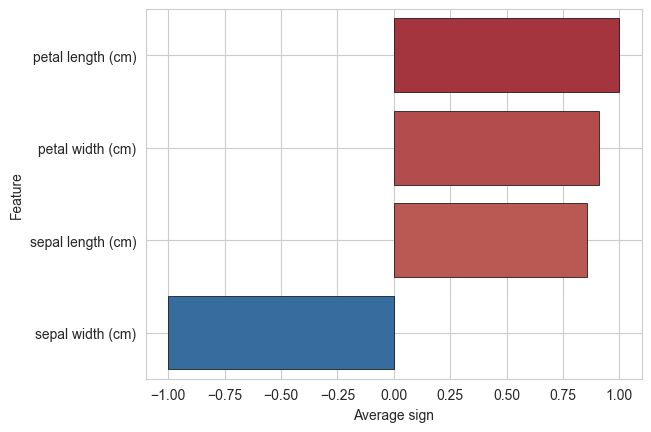

Model of class 2 :


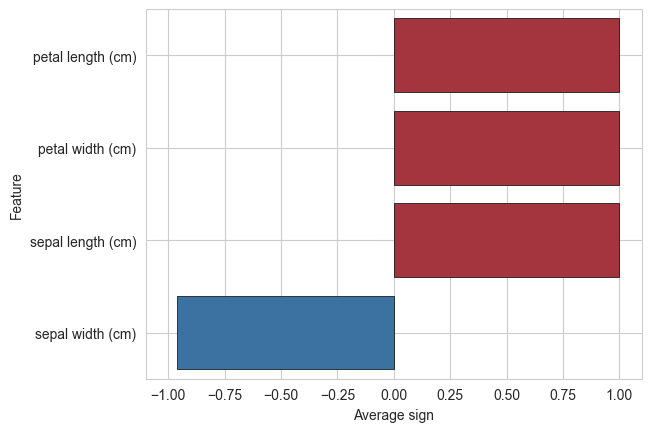

In [56]:
model = BaggedIcareClassifier(n_estimators=1000, n_jobs=-1)


model.fit(X,y)

import matplotlib.pyplot as plt
import numpy as np

for i in range(len(np.unique(y))):
    print('Model of class', i, ':')
    plot_avg_sign(model.estimators_[i])
    plt.show()
